In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head(10)

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499
5,1,name0 6 name1694 128gb clean condition,looks 1010035500 101008700 10100000 8 plus 64...,503,15,5,13800
6,1,name87 watch name251 3 38 mm gps name119 name...,one 101009200 3 perfect working condition def...,940,8,2,17000
7,2,name271 name1622 note 3gb ram 32gb inbuilt,10100000 6 101009200 16 gb good condition lig...,651,2,6,5000
8,1,iphone 732gbcondition new,10100000 7 32gb 10100248300 condition unused ...,42,2,6,21000
9,1,name0 7 128 gb,1010011400 101006100 101006200 available acce...,133,1,3,40000


null values - no null values 
imbalance class - its a regression problem
outliers -
eda
feature_selection
feature engineering 
model selection 

In [5]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   2326 non-null   int64 
 1   Model_Info              2326 non-null   object
 2   Additional_Description  2326 non-null   object
 3   Locality                2326 non-null   int64 
 4   City                    2326 non-null   int64 
 5   State                   2326 non-null   int64 
 6   Price                   2326 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 127.3+ KB


Eda

# Target Distribution

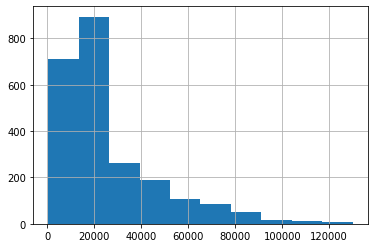

In [4]:
train['Price'].hist()

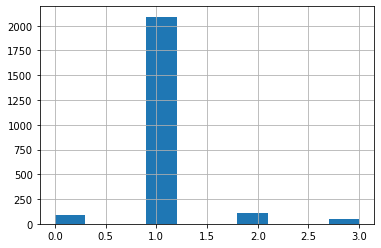

In [5]:
train['Brand'].hist()

In [4]:
#mean price brand wise

for i in [0,1,2,3]:
    print(f'brand {i} mean price {train[train.Brand == i].Price.mean()}')

brand 0 mean price 10374.011764705883
brand 1 mean price 27553.595887135343
brand 2 mean price 4408.428571428572
brand 3 mean price 11073.022222222222


# CLearly brand 1 is apple

In [5]:
for i in train[train.Brand == 1]['Model_Info']:
    print(i)

 name0 name234 64gb space grey
 phone 7 name42 name453 new condition box accessories
 name0 x 256gb leess used good condition
 name0 6s plus 64 gb space grey
 phone 7 sealed pack brand new factory outet price
 name0 6 name1694 128gb clean condition
 name87 watch name251 3 38 mm gps name119 name183 name62 scratch
 iphone 732gbcondition new
 name0 7 128 gb
 need sell iphone 7 32 gb
 name0 11 name49 green colour 256 gb indian bill 1 day used
 iphone 7plus 128gb box acessories
 name87 phone 7 cash delivery
 phone 6s name148 sealed unused brand new
 name0 6s 16gb urgent sale
 name87 phone 7 128gb name131 good condition
 special offers name0 top model cod
 name87 name0 8 plus 256gb accessories
 name113 iphone x 64gb att turbo unlock
 phone 6s 64gb space gray color
 iphone 7 128gb
 2372017 date slleng arjant sell
 name0 5s 16gb rose gold
 iphone 6s 32 gb gold
 name87 iphone 8 plus brand new condition bill
 brand new seal packed name0 8 5000
 name0 7 128gb red color
 name0 7 mint condition 32g

 name0 xs max 64 gb grey clean condition wrnty till nov lowest ever
 name123 name234 64gb name183 color
 phone 7 128 gb jet black
 name87 iphone xs max 64gb gold
 iphone 7 plus 32 gb jet black charger bluetooth headphones
 name411 128 gb mint condition
 name0 6 32gb
 phone 4s
 new box packed iphone name234 64gb brand new
 name87 name0 8 name103 64gb
 good working iphone xs 64gb
 name0 xr 4 months old
 name0 7 black 32gb
 xs max 512 gb bill box acceseries
 name0 6s name103 64gb 16000
 name0 7plus 128gb good condition
 name0 name1417 black 64 name182
 name87 iphone xs max
 iphone 6 32gb awesome condition
 good working condition 6s 32gb
 name0 se 32gb
 iphone name234 plus 64gb fabulous condition
 iphone 7 32gb excellent condition
 name87 name0 7 128gb accessories bill
 phone7 128 gb
 name0 6s 32 gigs storage
 name0 x white 64 gb
 name0 x 64 gb name119 name183
 name0 6s name753
 name87 replaced name0 x 64gb apple warranty brand new
 name0 xs 256gb
 phone x 256gb 4gb ram
 iphone 7 rose gold

there is some encoding using name0 name234 lets try to extract all different  names

In [50]:
import re 

encoded_names = []

for i in train[train.Brand == 1]['Model_Info']:
#     print(i)
    for j in i.split():    
#         print(j)
        find= re.findall('name\d+',j)
    
        if find != []:
            encoded_names.append(find[0])
        
# encoded_names

In [51]:
len(set(encoded_names)) #261 encoded features 

261

In [ ]:
# we need brand name = apple (got), iphone model = 5s  storage = 32gb  then price should be about 7k - 15k

In [134]:
# name 233 = 'honer'
# name615  = 'huawei'



for i,j in zip(train[train.Brand == 0]['Model_Info'],train[train.Brand == 0]['Price']):
    print(i.replace('name233','honer'),j)
    
    break

 honer 10 lite good pone one month lony used 9200


# Brand 0 == 'Huawei' 

In [135]:
for i,j in zip(train[train.Brand == 2]['Model_Info'],train[train.Brand == 2]['Price']):
    print(i,j)
    break

 name271 name1622 note 3gb ram 32gb inbuilt 5000


Brand 2 == "lenovo"

In [137]:
for i,j in zip(train[train.Brand == 3]['Model_Info'],train[train.Brand == 3]['Price']):
    print(i,j)
    
    break

 name2589 name3 5 4g name36 phone sing 3800
 name36 name3 4 2600
 name397 q 7 4 64 12800
 lg name1718 dual name376 name1719 warranty 13900 13900
 lg name583 128gb 11 name35 old bill box accessories also 13500
 selling name397 w30 new phone 8000
 lg q name2066 4gb 64 gb 12500
 name583 plus 9 month used 22000
 lg name503 7with 2gb ram 16 gb rom 2800
 name665 thin q box charger 10499
 name1662 mobile phone 4000
 lg name2603 name187 volte 4000
 lg name1755 name1719 9 months warranty 24900 24900
 lg name1536 full kit available good condition 7500
 lg name1536 used mobile full kit available 7500
 lg name1662 3gb32gb fhd full view display name1939 name164 condition 5300
 nexus name1967 mobilelower price 4500
 lg name1662 perfect condition 7500
 lg name1536 full box 8500
 lg name583 name42 128gb name1687 20000
 name397 name36 nexus 5 good condition 5000
 nexus name1967 name42 sale 32 gb w name78 name140 5500
 superrare lg v50 thinq name1611 dual screen 59900 59900
 lenovo name1622 name178 32gb

# Brand 3 == 'Lg'

# DataExtractor App

In [63]:
str = 'x   phone6s5s name42 name453 new condition box accessories'


str = str.replace('name0','phone')
re.findall('phone\ds*|x',str.replace(' ',''))




['x', 'phone6s', 'x']

In [260]:
# str = '  iphone7plus x phonese phone 6s5s name42 name453 new condition box accessories 16gb 16909 phoneseee'
str = ' phone 8 plus 64 gb 15 years used '
re.findall('phone\d{1}|\sx\s|\sse\s|phonese|phone\dplus',str.replace(" ",''))

['phone8']

In [321]:
import re

counter = 0
index = train[train.Brand == 1]['Model_Info'].index


replace = {
    'x256':'phonex',
 'x64':'phonex',
 'xr64':'phonexr',
 'xs256':'phonexs',
 'xs64':'phonexs',
 'xsmax':'phonexsmax',
    '11pro':'phone11pro',
 '4s':'phone4s',
 '5s':'phone5s',
 '6grey':'phone6',
 '6plus':'phone6plus',
 '6s':'phone6s',
 '7plus':'phone7plus',
 '7s':'phone7s',
 '8plus':'phone8plus',
 'eightplus':'phone8plus',
  'phone1':'phone11',  
    
}




models_train = []

for index,i in zip(index,train[train.Brand == 1]['Model_Info']):
    
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i.replace(' ',''))
    
    i = i.replace('name0','phone')
    i = i.replace('name123','phone')
    i = i.replace('name87','phone')
    i = i.replace('name234','6s')
    i = i.replace('name554','6')
    i = i.replace('name414','phone')
    i = i.replace('phones','phone')
    i = i.replace('name1653','phone')
    i = i.replace('sx','xs')
    
    i = i.replace('name2431','pod')
    
    
    '''
    name87 = phone
    name234 =  5s   name1857 name950
    name414 = xs
    name554 = 6
    
    to do
    
    phone1 -> phone11 
    
    11,11pro,11promax
    
    
    
    '''
#     print(i)
#     print('**************')
    
    
#     model_name = re.findall('phone\ds*|phones\ds*|phonex|phonexmax|watch|phonexr|ipad|xsmax|11|11pro|xs|sx|xr|max|\ds|\dplus|se',i.replace(' ',''))
    
    
    model_name = re.findall('phone11promax|phone11pro|phone11|phone\d{1}plus|phone\d{1}s|phone\d{1}|phonemax|phonexsmax|phonexs|phonexr|phonex|watch|ipad|xsmax|11pro|[6,7,8]plus|sevenplus|[4|5|6|7]s|pod|6grey|eightplus|se32|se64|xr64|xr128|xr256|xs64|xs128|xs256|x64|x128|x256',i.replace(' ',''))
    
    if len(model_name) >=1 and model_name[0] in replace.keys():
        model_name  = [replace[model_name[0]]]
        
     
    
    
    models_train+= model_name
    
#     print(model_name,train.iloc[index].Price)
    if model_name != [] or storage != []:
        
        counter += 1
        
#     if model_name == []:
#         print(i)
#         print(model_name,train.iloc[index].Price)
        
            
    
            
print(counter,len(train[train.Brand == 1]['Model_Info']))    
print(counter/len(train[train.Brand == 1]['Model_Info']) * 100)    

1831 2091
87.56575801052128


In [310]:
str = '  honor 10 lite good pone one month lony used'

str = str.replace(' ','')

re.findall('honor\d{1,2}[a-z]{0,1}',str)


['honor10l']

# Honor

In [62]:
counter = 0
index = train[train.Brand == 0]['Model_Info'].index

models_train = []
replace = {'honor82':'honor8','honor10n':'honor10'}
for index,i in zip(index,train[train.Brand == 0]['Model_Info']):
    
#     i = i.replace('name233','honor')
#     i = i.replace('honour','honor')
#     i = i.replace('honer','honor')
#     i = i.replace('name2778','honor')
#     i = i.replace('name615','honor')
    
    i = i.replace('name233','honor')
    i = i.replace('honour','honor')
    i = i.replace('honer','honor')
    i = i.replace('name2778','honor')
    i = i.replace('name615','honor')
    i = i.replace('name615','honor')
    i = i.replace('name2698','honor')
    i = i.replace('name1670','honor')
    i = i.replace('name1797','view')
    i = i.replace('name49','20')
    i = i.replace('name2716','9')
    i = i.replace('name182','gb')
    i = i.replace('name1482','lite')
    i = i.replace('name2755','9')
    i = i.replace('huawei','honor')
    i = i.replace('name308','20pro')
    i = i.replace('name2931','honor')
    
#     print(index,i)
    i = i.replace(' ','')
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i)
    model_name = re.findall('honor\d{1,2}[a|l|p|x|c|n]{0,1}|honorp\d{1,2}[l|p|x|c]{1}|honorholly4plus|honornova\d{1,2}[i|e|plus]|honorview\d{1,2}|honorplay\d{0,1}|honory9|honormate20pro',i)
    
#     print(model_name,train.loc[index].Price)
    
    if len(model_name) > 1 and model_name[0] in ['honor82','honor10','honor8n']:
        model_name[0] = replace[model_name[0]]
     
    models_train += model_name
    
    if model_name != [] or storage != []:
        counter += 1
        
        
        
    if model_name == []:
        print(index,i)
        print(model_name,train.loc[index].Price)
#         print(train.loc[index].Additional_Description)
#         print('*******')

   
print(counter,len(train[train.Brand == 0]['Model_Info']))      

115 honorname575sapphireblue4monthsusedonly3gb32gb
[] 7999
290 sellhonorname2815blackcolor
[] 9900
441 honorname14772019
[] 10000
450 honorname1456onemonthold
[] 6900
672 honorname671name248name425monthsoldbrandnewconditionboxbill
[] 11000
702 honorname671464gbname72condition
[] 14500
746 honorsmartphone
[] 4000
753 name25919litename54conditionsinwarrantyonescratches
[] 5500
1086 honorhonorname2756
[] 3800
1168 honorhonorname559
[] 7500
1176 honorname6714gb32gb
[] 11000
1453 name19complainthonorg5203gdualsimphoneneatcondition
[] 1499
1540 honorname57516mpname732132mpprimarycamera
[] 6700
1585 honorname6714gb64gb
[] 8000
1618 honorname1908sale
[] 6200
1681 honorname138036gb128gbcleanset
[] 18000
2226 honorname575blue4gb64gb
[] 7500
2322 huawiename2719lite
[] 5000
73 85


In [63]:
replace = {'honor82':'honor8','honor10n':'honor10'}

set(models_train)

{'honor10',
 'honor10l',
 'honor10n',
 'honor20',
 'honor4x',
 'honor5x',
 'honor6x',
 'honor7a',
 'honor7c',
 'honor7x',
 'honor8',
 'honor82',
 'honor8c',
 'honor8l',
 'honor8p',
 'honor8x',
 'honor9',
 'honor9l',
 'honor9n',
 'honor9x',
 'honorholly4plus',
 'honornova2p',
 'honornova3i',
 'honorp20l',
 'honorplay',
 'honorplay8',
 'honorview10',
 'honorview20'}

In [57]:
counter = 0
index = test[test.Brand == 0]['Model_Info'].index
models_test = []

for index,i in zip(index,test[test.Brand == 0]['Model_Info']):
    
     
    i = i.replace('name233','honor')
    i = i.replace('honour','honor')
    i = i.replace('honer','honor')
    i = i.replace('name2778','honor')
    i = i.replace('name615','honor')
    i = i.replace('name615','honor')
    i = i.replace('name2698','honor')
    i = i.replace('name1670','honor')
    i = i.replace('name1797','view')
    i = i.replace('name49','20')
    i = i.replace('name2716','9')
    i = i.replace('name182','gb')
    i = i.replace('name1482','lite')
    i = i.replace('name2755','9')
    i = i.replace('huawei','honor')
    i = i.replace('name308','20pro')
    i = i.replace('name2931','honor')
    
#     print(index,i)
    i = i.replace(' ','')
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i)
    model_name = re.findall('honor\d{1,2}[a|l|p|x|c|n]{0,1}|honorp\d{1,2}[l|p|x|c]{1}|honorholly4plus|honornova\d{1,2}[i|e|plus]|honorview\d{1,2}|honorplay\d{0,1}|honory9|honormate20p',i)
    
    
    
    models_test += model_name

    if model_name != []:
        counter += 1
        
    if model_name == []:
        print(i)
#         print(train.iloc[index]['Model_Info'])
   
print(counter,len(test[test.Brand == 0]['Model_Info']))      

honorname14084gb32
honorname27563gbram32internalstorage
honorname5753gbram32gbrom
honorname2938
honorname28156gbram128gbromblue3monthsused
37 42


In [58]:
set(models_test)

{'honor10',
 'honor10l',
 'honor10p',
 'honor20p',
 'honor32',
 'honor6x',
 'honor7a',
 'honor7c',
 'honor7x',
 'honor8x',
 'honor9l',
 'honor9n',
 'honormate20p',
 'honornova3e',
 'honorp20l',
 'honorplay',
 'honorplay4',
 'honorplay6',
 'honorview20',
 'honory9'}

# Lenovo

In [195]:

counter = 0
models_train = []
for i in train[train.Brand == 2]['Model_Info']:
    
    
    
    #only keeping the first letter of the series eg. k , q ,vibe 
    
    
    i = i.replace('name271','lenovo')
    i = i.replace('name1032','lenovo')
    i = i.replace('name2795','lenovo')
    i = i.replace('name309','lenovo')
    i = i.replace('x2 lenovo','lenovo x2')
    i = i.replace('name789','k8')
    i = i.replace('name666','k8')
    i = i.replace('name1622','k8')
    i = i.replace('name716','k8')
    i = i.replace('name2604','zuk')
    i = i.replace('k8','lenovok')
    i = i.replace('name472','k5')
    
#     print(i)

    i = i.replace(' ','')
    
    #lenovo k : k, v:vibe , z:zuk
    
#     model_name = re.findall('lenovok\d{1}|lenovovibe|lenovozuk|lenovoa[6000|6600]|lenovophab2plus|lenovo4g|lenovop1m|k8plus|lenovoz2plus|lenovop1|lenovoideapad|lenovo6000|lenovox2|lenovop2a42',i)
    model_name = re.findall('lenovo[a|z|v|z|p|0-9|k]|lenova232|lenovoideapad',i)
#     print(model_name)
    
    models_train += model_name
    
    if model_name != []:
        
        counter += 1
        
#     if model_name == []:
#         print(i)
    
    
print(counter,train[train.Brand == 2]['Model_Info'].count())  
print(set(models_train))

76 105
{'lenovo6', 'lenovoideapad', 'lenovop', 'lenovoz', 'lenovok', 'lenovoa', 'lenovov', 'lenovo4'}


In [193]:

counter = 0
models_test = []
for i in test[test.Brand == 2]['Model_Info']:
    
    
    
    #only keeping the first letter of the series eg. k , q ,vibe 
    
    
    i = i.replace('name271','lenovo')
    i = i.replace('name1032','lenovo')
    i = i.replace('name2795','lenovo')
    i = i.replace('name309','lenovo')
    i = i.replace('x2lenovo','lenovox2')
    i = i.replace('name789','k')
    i = i.replace('name45','lenovo')
    i = i.replace('name503','lenovo')
    i = i.replace('name1622','lenovo')
    i = i.replace('name789','k8')
    i = i.replace('name666','k8')
    i = i.replace('name1622','k8')
    i = i.replace('name716','k8')
    i = i.replace('name2604','zuk')
    i = i.replace('k8','lenovok')
    i = i.replace('name472','k5')
#     print(i)
    i = i.replace(' ','')
    
    #lenovo k : k, v:vibe , z:zuk
    
    model_name = re.findall('lenovo[x|a|z|v|z|p|0-9|k]|lenova232',i)
    
    models_test += model_name
    
    
    if model_name != []:
        
        counter += 1
        
    if model_name == []:
        print(i)
    
    
print(counter,test[test.Brand == 2]['Model_Info'].count())    
set(models_test)

name340name9834gb64gb
lenovobgoodconditionname187phone
goodconditionswellmaintainedboxpricenegotiable
lenovolenovoname1033
lenovoname10332gb16gb5inch4gdualsim
goodconditionbillboxprice4000
name42colour
goodcondition
lenovoname177664gb
name2568goodcondition
lenovolenovoname1033name923gbram
lenovoname1033note4gbram32gbinternal
goodconditionmobilescreenlittlecrack
goodconditionlenovoname670name923gb32gb
3gbram32internalmemory
goodconditions
chaluakdam
name51goodcondition
28 46


{'lenova232',
 'lenovo8',
 'lenovoa',
 'lenovok',
 'lenovop',
 'lenovov',
 'lenovox',
 'lenovoz'}

In [135]:
counter = 0
index = train[train.Brand == 3]['Model_Info'].index

models_train = []

for index,i in zip(index,train[train.Brand == 3]['Model_Info']):
 

    
    
    
    i = i.replace('name2589','lg')
    i = i.replace('name36','lg')
    i = i.replace('name397','lg')
    i = i.replace('name665','lg')
    i = i.replace('name3','g')
    
    i = i.replace('name503','q')
    i = i.replace('name2689','q')
    i = i.replace('name2066','6+')
    i = i.replace('name583','lgv30')
    
    i = i.replace('name1755','')
    
#     print(index,i)
    i = i.replace(' ','')
    
    mobile_info = re.findall('lg[g|q|w|v|0-9|k]|lgstylush2|lgv30plus|lgthinq|lgname1536|nexus|lgph2|name1662|lgg4',i)
#     print(mobile_info)
    
    models_train += mobile_info
    
    if mobile_info != []:
        counter += 1
    
    
    
   
print(counter,len(train[train.Brand == 3]['Model_Info']))  

print(set(models_train))

34 45
{'lgv', 'lgg', 'nexus', 'lgw', 'lgname1536', 'lgph2', 'name1662', 'lg6', 'lgthinq', 'lgq', 'lg7', 'lgstylush2'}


In [134]:
counter = 0
index = train[train.Brand == 3]['Model_Info'].index

models_test = []

for index,i in zip(index,test[test.Brand == 3]['Model_Info']):
 

    
    
    
    i = i.replace('name2589','lg')
    i = i.replace('name36','lg')
    i = i.replace('name397','lg')
    i = i.replace('name665','lg')
    i = i.replace('name3','g')
    
    i = i.replace('name503','q')
    i = i.replace('name2689','q')
    i = i.replace('name2066','6+')
    i = i.replace('name583','lgv30')
    
    i = i.replace('name1755','')
    
#     print(index,i)
    i = i.replace(' ','')
    
    mobile_info = re.findall('lg[g|q|w|v|0-9|k]|lgstylush2|lgv30plus|lgthinq|lgname1536|nexus|lgph2|name1662',i)
#     print(mobile_info)
    
    models_test += mobile_info
    
    if mobile_info != []:
        counter += 1
    
    
    
   
print(counter,len(test[test.Brand == 3]['Model_Info']))  

print(set(models_test))

15 17
{'lgv', 'lgg', 'name1662', 'lg6', 'lgk', 'lgq', 'nexus', 'lg4'}


In [324]:
def honor(i):
    
    i = i.replace('name233','honor')
    i = i.replace('honour','honor')
    i = i.replace('honer','honor')
    i = i.replace('name2778','honor')
    i = i.replace('name615','honor')
    i = i.replace('name615','honor')
    i = i.replace('name2698','honor')
    i = i.replace('name1670','honor')
    i = i.replace('name1797','view')
    i = i.replace('name49','20')
    i = i.replace('name2716','9')
    i = i.replace('name182','gb')
    i = i.replace('name1482','lite')
    i = i.replace('name2755','9')
    i = i.replace('huawei','honor')
    i = i.replace('name308','20pro')
    i = i.replace('name2931','honor')

    i = i.replace(' ','')
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i)
    model_name = re.findall('honor\d{1,2}[a|l|p|x|c|n]{0,1}|honorp\d{1,2}[l|p|x|c]{1}|honorholly4plus|honornova\d{1,2}[i|e|plus]|honorview\d{1,2}|honorplay\d{0,1}|honory9|honormate20pro',i)
    

    
    if len(model_name) > 1 and model_name[0] in ['honor82','honor10','honor8n']:
        model_name[0] = replace[model_name[0]]
    
    
    
    return model_name,storage
    
def apple(i):
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i.replace(' ',''))
        
    replace = {
     'x256':'phonex',
     'x64':'phonex',
     'xr64':'phonexr',
     'xs256':'phonexs',
     'xs64':'phonexs',
     'xsmax':'phonexsmax',
        '11pro':'phone11pro',
     '4s':'phone4s',
     '5s':'phone5s',
     '6grey':'phone6',
     '6plus':'phone6plus',
     '6s':'phone6s',
     '7plus':'phone7plus',
     '7s':'phone7s',
     '8plus':'phone8plus',
     'eightplus':'phone8plus',
      'phone1':'phone11',  

    }
   

    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i.replace(' ',''))

    i = i.replace('name0','phone')
    i = i.replace('name123','phone')
    i = i.replace('name87','phone')
    i = i.replace('name234','6s')
    i = i.replace('name554','6')
    i = i.replace('name414','phone')
    i = i.replace('phones','phone')
    i = i.replace('name1653','phone')
    i = i.replace('sx','xs')

    i = i.replace('name2431','pod')


        
    
    model_name = re.findall('phone11promax|phone11pro|phone11|phone\d{1}plus|phone\d{1}s|phone\d{1}|phonemax|phonexsmax|phonexs|phonexr|phonex|watch|ipad|xsmax|11pro|[6,7,8]plus|sevenplus|[4|5|6|7]s|pod|6grey|eightplus|se32|se64|xr64|xr128|xr256|xs64|xs128|xs256|x64|x128|x256',i.replace(' ',''))
    
    if len(model_name) >=1 and model_name[0] in replace.keys():
        model_name  = [replace[model_name[0]]]
        
     
    
    return model_name,storage


def lenovo(i):
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i.replace(' ',''))
    i = i.replace('name271','lenovo')
    i = i.replace('name1032','lenovo')
    i = i.replace('name2795','lenovo')
    i = i.replace('name309','lenovo')
    i = i.replace('x2 lenovo','lenovo x2')
    i = i.replace('name789','k8')
    i = i.replace('name666','k8')
    i = i.replace('name1622','k8')
    i = i.replace('name716','k8')
    i = i.replace('name2604','zuk')
    i = i.replace('k8','lenovok')
    i = i.replace('name472','k5')
    
#     print(i)

    i = i.replace(' ','')
    
    #lenovo k : k, v:vibe , z:zuk
    
#     model_name = re.findall('lenovok\d{1}|lenovovibe|lenovozuk|lenovoa[6000|6600]|lenovophab2plus|lenovo4g|lenovop1m|k8plus|lenovoz2plus|lenovop1|lenovoideapad|lenovo6000|lenovox2|lenovop2a42',i)
    model_name = re.findall('lenovo[a|z|v|z|p|0-9|k]|lenova232|lenovoideapad',i)
    
    
    return model_name,storage


def lg(i):
    
    storage = re.findall('16gb|32gb|64gb|128gb|256gb|512gb',i.replace(' ',''))
    i = i.replace('name2589','lg')
    i = i.replace('name36','lg')
    i = i.replace('name397','lg')
    i = i.replace('name665','lg')
    i = i.replace('name3','g')
    
    i = i.replace('name503','q')
    i = i.replace('name2689','q')
    i = i.replace('name2066','6+')
    i = i.replace('name583','lgv30')
    
    i = i.replace('name1755','')
    
#     print(index,i)
    i = i.replace(' ','')
    
    mobile_info = re.findall('lg[g|q|w|v|0-9|k]|lgstylush2|lgv30plus|lgthinq|lgname1536|nexus|lgph2|name1662|lgg4',i)
#     print(mobile_info)


    return mobile_info,storage
    


In [325]:
model_name = []
model_storage = []
model_ram = []


d = {0:honor,1:apple,2:lenovo,3:lg}

from tqdm import tqdm


for index in tqdm(train.index):
    
#     print(d[train.iloc[index].Brand](train.iloc[index].Model_Info))
    
    mobile_info = d[train.iloc[index].Brand](train.iloc[index].Model_Info)
          
    model_name.append(mobile_info[0])
    
    model_storage.append(mobile_info[1])
        

    
   
    







100%|██████████| 2326/2326 [00:01<00:00, 1845.86it/s]


In [326]:
train['model_name'] = model_name
train['model_storage'] = model_storage

# Need more preprocessing  for storage

In [327]:
def mapper_1(x):
    
    if len(x) >= 1:
        return int(x[0].split('gb')[0])
    else:
        return 0

    
      


train['model_storage'] = train['model_storage'].map(mapper_1)

In [175]:
train.columns

Index(['Brand', 'Model_Info', 'Additional_Description', 'Locality', 'City',
       'State', 'Price', 'model_name', 'model_storage', 'encoded_name'],
      dtype='object')

In [328]:
def mapper_2(x):
  
  if x != []:
     
     if x[0] in ['se','max','5','5s','6','6s','7','7s','8','8plus','x','xs','max','4s']:
             return 'phone'+x[0]
            
            
     elif x[0] == 'honor10n':
        return 'honor10'
     
     elif x[0] == 'honor82':
        return 'honor8'
            
     else:
        return x[0]
    
    
  return 'nan'

train['model_name'] = train['model_name'].map(mapper_2)

# train['model_name']

In [329]:

train['model_name'].value_counts()

nan            396
phone7         342
phone6s        307
phone6         202
phone7plus     141
              ... 
honorplay8       1
honor9           1
honor9x          1
honornova2p      1
honor8l          1
Name: model_name, Length: 76, dtype: int64

# TestSet

In [330]:
test_model_name = []
test_model_storage = []
test_model_ram = []


d = {0:honor,1:apple,2:lenovo,3:lg}

from tqdm import tqdm


for index in tqdm(test.index):
    
#     print(d[train.iloc[index].Brand](train.iloc[index].Model_Info))
    
    mobile_info = d[test.iloc[index].Brand](test.iloc[index].Model_Info)
          
    test_model_name.append(mobile_info[0])
    
    test_model_storage.append(mobile_info[1])
        

100%|██████████| 997/997 [00:00<00:00, 1692.57it/s]


In [331]:
test['model_name'] = test_model_name
test['model_storage'] = test_model_storage
test['model_storage'] = test['model_storage'].map(mapper_1)

print(test['model_storage'].value_counts())

test['model_name'] = test['model_name'].map(mapper_2)
print(test['model_name'].value_counts())

0      383
64     222
32     142
128    114
16      72
256     58
512      6
Name: model_storage, dtype: int64
nan         173
phone7      147
phone6s     121
phone6      102
phonex       66
           ... 
phone7s       1
phone1s       1
honor10p      1
lgk           1
honory9       1
Name: model_name, Length: 61, dtype: int64


# Get all Model Names 

In [332]:

unique_models = []
for i in range(0,4):
    
    train_models = train[train.Brand == i]['model_name'].values
    test_models = test[test.Brand == i]['model_name'].values
    
    
    unique_models += list(set(train_models).union(set(test_models)))
    
    
len(set(unique_models))
    
    

    

87

In [333]:
from collections import Counter 

unique_models = list(set(unique_models))

In [336]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le = LabelEncoder()
le.fit(unique_models)
train['encoded_name'] = le.transform(train['model_name'].values.ravel())


In [238]:
# train['American_made'] = train['Brand'].map(lambda x : 1 if x == 1 else 0) 

In [241]:
# train['American_made'].value_counts() 

1    2091
0     235
Name: American_made, dtype: int64

In [370]:
import pickle as pk

pk.dump(train,open('processed_train','wb'))

pk.dump(test,open('processed_test','wb'))

In [401]:
train_cols = ['Brand','City','State','Locality','model_storage','encoded_name']
target_col = ['Price']

x = train[train_cols].values
y = train[target_col].values.ravel()

In [403]:
x,y

(array([[   1,    8,    2,  878,   64,   70],
        [   1,    4,    0, 1081,    0,   71],
        [   1,   11,    4,  495,  256,   78],
        ...,
        [   1,   11,    4,  318,   16,   67],
        [   1,    2,    6,  217,   32,   71],
        [   1,   15,    5,  855,   64,   77]], dtype=int64),
 array([15000, 18800, 50000, ...,  7500, 22000, 92000], dtype=int64))

In [437]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold


from sklearn.linear_model import LinearRegression,Lasso,Ridge,RANSACRegressor


clf1 = RandomForestRegressor(n_estimators=100,
#                              max_depth = 10,
#                              max_samples = 1500,
                             random_state = 991,
                             n_jobs = -1)

clf2 = ExtraTreesRegressor(n_estimators=100,random_state = 991,n_jobs = -1)

clf3 = SVR()

clf4 = LinearRegression(n_jobs = -1)

clf5 = Ridge(alpha = 1.0)

clf6 = Lasso(alpha = 1.0)

clf7 = RANSACRegressor(random_state = 101)




kfold = KFold(n_splits=10,shuffle = True,random_state=991)


for train_idx,test_idx in kfold.split(x):
    
    trainx,testx = x[train_idx],x[test_idx]
    trainy,testy = y[train_idx],y[test_idx]

    
    clf1.fit(trainx,trainy)
#     clf2.fit(trainx,trainy)
#     clf3.fit(trainx,trainy)
#     clf4.fit(trainx,trainy)
#     clf5.fit(trainx,trainy)
#     clf6.fit(trainx,trainy)
#     clf7.fit(trainx,trainy)
    
    pred1 = clf1.predict(testx)
#     pred2 = clf2.predict(testx)
#     pred3 = abs(clf3.predict(testx))
#     pred4 = abs(clf4.predict(testx))
#     pred5 = abs(clf5.predict(testx))
#     pred6 = abs(clf6.predict(testx))
#     pred7 = abs(clf7.predict(testx))
        
        
    print('rf',np.sqrt(mean_squared_log_error(pred1,testy)))
#     print('et',np.sqrt(mean_squared_log_error(pred2,testy)))
#     print('svm',np.sqrt(mean_squared_log_error(pred3,testy)))
#     print('lr',np.sqrt(mean_squared_log_error(pred4,testy)))
#     print('rigid',np.sqrt(mean_squared_log_error(pred5,testy)))
#     print('lasso',np.sqrt(mean_squared_log_error(pred6,testy)))
#     print('new',np.sqrt(mean_squared_log_error(pred7,testy)))
    
    
#     pred = np.log(pred+1)
    
#     true = np.log(testy+1)
    
    
#     print(np.sqrt(np.mean((pred - true)**2)))
    
    
    
    
    
    
    
    



rf 0.5222157248137579
rf 0.4743114452453994
rf 0.4202299801017473
rf 0.5493914726355901
rf 0.4874333223933735
rf 0.6212660514625971
rf 0.46453005206136405
rf 0.49173120182710994
rf 0.4535195550256997
rf 0.46415285764388503


# RandomForest Hyperparameter tuning

In [395]:
RandomForestRegressor?

In [405]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split



# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']


# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

max_samples = [100,500,len(train) - 400,len(train)- 200,len(train)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples':max_samples
              }


rf = RandomForestRegressor()


def rmsle(true,pred):
    
    return np.sqrt(mean_squared_log_error(pred1,testy))
    
rmsle = make_scorer(rmsle)
 
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=random_grid,
                                   n_iter=100,
                                   random_state = 909,
                                   n_jobs = -1,
                                   verbose = 1)


# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = True,random_state = 989)


random_search.fit(x,y)




Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [100, 500, 1926, 2126,
                                                        2326],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=909, verbose=1)

In [407]:
best_params = random_search.best_params_
random_search.best_score_

0.7206268362804994

# VoterRegressor approach 

In [430]:
from sklearn.ensemble import VotingRegressor

estimators = [('rf',clf1),('etr',clf2)]

reg = VotingRegressor(estimators=estimators,n_jobs=-1)



kfold = KFold(n_splits=10,shuffle = True,random_state=991)


for train_idx,test_idx in kfold.split(x):
    
    trainx,testx = x[train_idx],x[test_idx]
    trainy,testy = y[train_idx],y[test_idx]

    
    reg.fit(trainx,trainy)
   
    pred1 = reg.predict(testx)

        
    print(np.sqrt(mean_squared_log_error(pred1,testy)))
   

# got an score of 0.52  with kfold = 3
# got an score of 0.49912  with kfold = 5
# got an score of 0.496  with kfold = 10
#only extra tree gets a score of 0.54

0.5117576683177435
0.4692538906136155
0.4199420370159157
0.5153395836757876
0.4953272280932921
0.6123963388359128
0.44191099821499363
0.48986573105726744
0.41170771115759686
0.4526759844490578


In [391]:
clf1.feature_importances_

array([0.01677803, 0.0403446 , 0.03073149, 0.13634707, 0.10734351,
       0.6684553 ])

# Submission File

In [427]:
test['encoded_name'] = le.transform(test['model_name'])
train_cols = ['Brand','City','State','Locality','model_storage','encoded_name']
xtest = test[train_cols].values

xtest

array([[  1,  11,   4, 570,   0,  66],
       [  1,   8,   2, 762,   0,  67],
       [  1,  13,   5,  60,   0,  80],
       ...,
       [  0,  13,   5, 352, 128,  56],
       [  1,   4,   0, 350,   0,  68],
       [  1,  11,   4, 602, 128,  71]], dtype=int64)

In [438]:
preds = clf1.predict(xtest)

In [439]:
sub = pd.read_excel('Sample_Submission.xlsx')
sub['Price'] = preds
sub.to_excel('rf_final_3withfold10.xlsx',index=False)